<a href="https://colab.research.google.com/github/Vijce/Group-16-Final-Project/blob/main/Data%20Processing%20%26%20Initial%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error


# Load Data

In [ ]:
df_department = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JMU/Practical Data Science/Assignments/Final Project/company_department_file_v2.csv')

display(df_department)
display(df_department.isna().sum())
pd.unique(df_department['label'])

,text,label
0,Adjoint directeur communication,Marketing
1,Advisor Strategy and Projects,Project Management
2,Beratung & Projekte,Project Management
3,Beratung & Projektmanagement,Project Management
4,Beratung und Projektmanagement kommunale Partner,Project Management
...,...,...
10140,VP Sales D.A.CH.,Sales
10141,VP Sales DACH,Sales
10142,VP Sales Development & Strategy,Sales
10143,VP Sales Germany,Sales


,0
text,0
label,0


array(['Marketing', 'Project Management', 'Administrative',
       'Business Development', 'Consulting', 'Human Resources',
       'Information Technology', 'Other', 'Purchasing', 'Sales',
       'Customer Support'], dtype=object)

In [ ]:
df_department['text'] = df_department['text'].str.lower()
df_department

,text,label
0,adjoint directeur communication,Marketing
1,advisor strategy and projects,Project Management
2,beratung & projekte,Project Management
3,beratung & projektmanagement,Project Management
4,beratung und projektmanagement kommunale partner,Project Management
...,...,...
10140,vp sales d.a.ch.,Sales
10141,vp sales dach,Sales
10142,vp sales development & strategy,Sales
10143,vp sales germany,Sales


In [ ]:
df_seniority = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JMU/Practical Data Science/Assignments/Final Project/seniority_label_v2.csv')

display(df_seniority, df_seniority.isna().sum())
pd.unique(df_seniority['label'])

,text,label
0,Analyst,Junior
1,Analyste financier,Junior
2,Anwendungstechnischer Mitarbeiter,Junior
3,Application Engineer,Senior
4,Applications Engineer,Senior
...,...,...
9423,VP Sales D.A.CH.,Management
9424,VP Sales DACH,Management
9425,VP Sales Development & Strategy,Management
9426,VP Sales Germany,Management


,0
text,0
label,0


array(['Junior', 'Senior', 'Lead', 'Management', 'Director'], dtype=object)

In [ ]:
df_seniority['text'] = df_seniority['text'].str.lower()

df_seniority

,text,label
0,analyst,Junior
1,analyste financier,Junior
2,anwendungstechnischer mitarbeiter,Junior
3,application engineer,Senior
4,applications engineer,Senior
...,...,...
9423,vp sales d.a.ch.,Management
9424,vp sales dach,Management
9425,vp sales development & strategy,Management
9426,vp sales germany,Management


In [ ]:
import json

file_path_annotated = '/content/drive/MyDrive/Colab Notebooks/JMU/Practical Data Science/Assignments/Final Project/linkedin-cvs-annotated_test_data_set (training data).json'

file_path_tobepredict = '/content/drive/MyDrive/Colab Notebooks/JMU/Practical Data Science/Assignments/Final Project/linkedin-cvs-not-annotated_to_be_predicted.json'

def read_json_file(file_path):
  with open(file_path, 'r') as file:
      jason_data = json.load(file)

  flat_data = []
  for item in jason_data:
      for subitem in item:
          flat_data.append(subitem)

  df = pd.DataFrame(flat_data)
  return df

df = read_json_file(file_path_annotated)
df_predict = read_json_file(file_path_tobepredict)

display(df,df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   organization  2638 non-null   object
 1   linkedin      2638 non-null   object
 2   position      2638 non-null   object
 3   startDate     2520 non-null   object
 4   endDate       1897 non-null   object
 5   status        2638 non-null   object
 6   department    2638 non-null   object
 7   seniority     2638 non-null   object
dtypes: object(8)
memory usage: 165.0+ KB


,organization,linkedin,position,startDate,endDate,status,department,seniority
0,Depot4Design GmbH,https://www.linkedin.com/company/depot4design-...,Prokurist,2019-08,None,ACTIVE,Other,Management
1,Depot4Design GmbH,https://www.linkedin.com/company/depot4design-...,CFO,2019-07,None,ACTIVE,Other,Management
2,Depot4Design GmbH,https://www.linkedin.com/company/depot4design-...,Betriebswirtin,2019-07,None,ACTIVE,Other,Professional
3,Depot4Design GmbH,https://www.linkedin.com/company/depot4design-...,Prokuristin,2019-07,None,ACTIVE,Other,Management
4,Depot4Design GmbH,https://www.linkedin.com/company/depot4design-...,CFO,2019-07,None,ACTIVE,Other,Management
...,...,...,...,...,...,...,...,...
2633,Bistum,,Justitiar,2014-03,None,ACTIVE,Other,Professional
2634,FORESTA Management,,Geschäftsführer,2010-01,None,ACTIVE,Other,Management
2635,Malteser Hilfsdienst,https://www.linkedin.com/company/malteser-hilf...,Präsidium,1999,None,ACTIVE,Other,Management
2636,Spies & Brunner RAe,,Rechtsanwalt,1995-01,None,ACTIVE,Other,Professional


None

In [ ]:
df[['position', 'status', 'organization']] = df[['position', 'status', 'organization']].apply(lambda x: x.str.lower())

df

,organization,linkedin,position,startDate,endDate,status,department,seniority
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokurist,2019-08,None,active,Other,Management
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,betriebswirtin,2019-07,None,active,Other,Professional
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokuristin,2019-07,None,active,Other,Management
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management
...,...,...,...,...,...,...,...,...
2633,bistum,,justitiar,2014-03,None,active,Other,Professional
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilf...,präsidium,1999,None,active,Other,Management
2636,spies & brunner rae,,rechtsanwalt,1995-01,None,active,Other,Professional


In [ ]:
df['status'].value_counts()

,count
status,
inactive,1897
active,623
unknown,118


In [ ]:
df_linkedin = df.copy()
df_linkedin = df_linkedin[df_linkedin['status'] == 'active']

df_linkedin

,organization,linkedin,position,startDate,endDate,status,department,seniority
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokurist,2019-08,None,active,Other,Management
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,betriebswirtin,2019-07,None,active,Other,Professional
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokuristin,2019-07,None,active,Other,Management
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management
...,...,...,...,...,...,...,...,...
2632,malteserorden,,kanzler der deutschen assoziation,2015-01,None,active,Other,Management
2633,bistum,,justitiar,2014-03,None,active,Other,Professional
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilf...,präsidium,1999,None,active,Other,Management


In [ ]:
df_linkedin.isna().sum()

,0
organization,0
linkedin,0
position,0
startDate,0
endDate,623
status,0
department,0
seniority,0


In [ ]:
display(df_predict,df_predict.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   organization  1886 non-null   object
 1   linkedin      1886 non-null   object
 2   position      1886 non-null   object
 3   startDate     1828 non-null   object
 4   endDate       1409 non-null   object
 5   status        1886 non-null   object
dtypes: object(6)
memory usage: 88.5+ KB


,organization,linkedin,position,startDate,endDate,status
0,"Keeping The Books, Bookkeeping",,Bookkeeper,2023-03,None,ACTIVE
1,Playful Paws,,Co-Owner,2018-11,None,ACTIVE
2,S&R services,,Logistics Officer,2019-09,2024-04,INACTIVE
3,ABC Supply Co. Inc.,https://www.linkedin.com/company/abc-supply,Truck driver/ laborer,2019-03,2019-09,INACTIVE
4,MB Railways,,Fuel Driver,2018-03,2019-03,INACTIVE
...,...,...,...,...,...,...
1881,Euler Hermes Deutschland,https://www.linkedin.com/company/allianz-trade-deutschland,Juristischer Berater,1996-03,None,ACTIVE
1882,Folkwang Universität der Künste,,"Leitung Personal, Finanzen, Einkauf, IT | Folkwang Universität der Künste",2015-07,None,ACTIVE
1883,Landesspracheninstitut in der Ruhr-Universität Bochum (LSI),,Verwaltungsleitung Landesspracheninstitut in der Ruhr Universität Bochum,2005-10,2015-06,INACTIVE
1884,Folkwang Universität der Künste,,"Leitung Gebäudemanagement, Einkauf und Controlling",2004-03,2005-09,INACTIVE


None

In [ ]:
df_predict[['position', 'status', 'organization']] = df_predict[['position', 'status', 'organization']].apply(lambda x: x.str.lower())

df_predict

,organization,linkedin,position,startDate,endDate,status
0,"keeping the books, bookkeeping",,bookkeeper,2023-03,None,active
1,playful paws,,co-owner,2018-11,None,active
2,s&r services,,logistics officer,2019-09,2024-04,inactive
3,abc supply co. inc.,https://www.linkedin.com/company/abc-supply,truck driver/ laborer,2019-03,2019-09,inactive
4,mb railways,,fuel driver,2018-03,2019-03,inactive
...,...,...,...,...,...,...
1881,euler hermes deutschland,https://www.linkedin.com/company/allianz-trade-deutschland,juristischer berater,1996-03,None,active
1882,folkwang universität der künste,,"leitung personal, finanzen, einkauf, it | folkwang universität der künste",2015-07,None,active
1883,landesspracheninstitut in der ruhr-universität bochum (lsi),,verwaltungsleitung landesspracheninstitut in der ruhr universität bochum,2005-10,2015-06,inactive
1884,folkwang universität der künste,,"leitung gebäudemanagement, einkauf und controlling",2004-03,2005-09,inactive


In [ ]:
df_predict.isna().sum()

,0
organization,0
linkedin,0
position,0
startDate,58
endDate,477
status,0


# 1. Rule-based matching

Pure text matching.

Using csv of department and seniority data as reference to predic JSON linkedin data

In [ ]:
department_list = [(row['text'], row['label']) for index, row in df_department.iterrows()]

seniority_list = [(row['text'], row['label']) for index, row in df_seniority.iterrows()]

df_linkedin_match = df_linkedin.copy()

X_base = df_linkedin_match['position']
y_base_dept = df_linkedin_match['department']
y_base_seni = df_linkedin_match['seniority']

def predict_department(X_base):
    for text, label in department_list:
        if text in X_base:
            return label
    return 'Other'

def predict_seniority(X_base):
    for text, label in seniority_list:
        if text in X_base:
            return label
    return 'Other'

df_linkedin_match['predict_label_dept'] = X_base.apply(predict_department)
df_linkedin_match['predict_label_seni'] = X_base.apply(predict_seniority)

accuracy_dept = accuracy_score(y_base_dept, df_linkedin_match['predict_label_dept'])
accuracy_seni = accuracy_score(y_base_seni, df_linkedin_match['predict_label_seni'])

print(f'Department Prediction Accuracy: {accuracy_dept}')
print(f'Seniority Prediction Accuracy: {accuracy_seni}')

Department Prediction Accuracy: 0.622792937399679
Seniority Prediction Accuracy: 0.35313001605136435


Manual splitting original text into a set of words.

The matching accuracy improved little.

In [ ]:
department_keywords = [
    (set(row['text'].split()), row['label'])
    for index, row in df_department.iterrows()
]

seniority_keywords = [
    (set(row['text'].split()), row['label'])
    for index, row in df_seniority.iterrows()
]

def predict_department_set(X_base):
    position_tokens = set(X_base.split())
    for keyword, label in department_keywords:
        if keyword.issubset(position_tokens):
            return label
    return 'Other'

def predict_seniority_set(X_base):
    position_tokens = set(X_base.split())
    for keyword, label in seniority_keywords:
        if keyword.issubset(position_tokens):
            return label
    return 'Other'

df_linkedin_match['predict_label_dept'] = X_base.apply(predict_department_set)
df_linkedin_match['predict_label_seni'] = X_base.apply(predict_seniority_set)

accuracy_dept = accuracy_score(y_base_dept, df_linkedin_match['predict_label_dept'])
accuracy_seni = accuracy_score(y_base_seni, df_linkedin_match['predict_label_seni'])

print(f'Department Prediction Accuracy: {accuracy_dept}')
print(f'Seniority Prediction Accuracy: {accuracy_seni}')


Department Prediction Accuracy: 0.6837881219903692
Seniority Prediction Accuracy: 0.33386837881219905


# 2. ML Models

## a.) Scikit-Learn: TfidfTransformer + RandomForestClassifier

In [ ]:
df_linkedin

,organization,linkedin,position,startDate,endDate,status,department,seniority
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokurist,2019-08,None,active,Other,Management
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,betriebswirtin,2019-07,None,active,Other,Professional
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokuristin,2019-07,None,active,Other,Management
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management
...,...,...,...,...,...,...,...,...
2632,malteserorden,,kanzler der deutschen assoziation,2015-01,None,active,Other,Management
2633,bistum,,justitiar,2014-03,None,active,Other,Professional
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilf...,präsidium,1999,None,active,Other,Management


Training model by using csv of department and seniority

In [ ]:
def data_split(df, test_size):
  X = df['text']
  y = df['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  return X_train, X_test, y_train, y_test

X_train_dept, X_test_dept, y_train_dept, y_test_dept = data_split(df_department, 0.2)

X_train_seni, X_test_seni, y_train_seni, y_test_seni = data_split(df_seniority, 0.2)


In [ ]:
from sklearn.base import clone
rfc = Pipeline([
    ('count_vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('model', RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42))
])

rfc_dept = clone(rfc)
rfc_dept.fit(X_train_dept, y_train_dept)

rfc_seni = clone(rfc)
rfc_seni.fit(X_train_seni, y_train_seni)

Pipeline(steps=[('count_vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [ ]:
def evaluation_report(model, X, y):
  predict = model.predict(X)
  report = classification_report(
      y,
      predict,
      output_dict=True
  )

  return report


####Department csv model evaluation

In [ ]:
rfc_dept_insample_report = evaluation_report(rfc_dept, X_train_dept, y_train_dept)

pd.DataFrame(rfc_dept_insample_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Administrative,0.000000,0.000000,0.000000,72.000000
Business Development,1.000000,0.018750,0.036810,480.000000
Consulting,0.000000,0.000000,0.000000,134.000000
Customer Support,0.000000,0.000000,0.000000,23.000000
Human Resources,0.000000,0.000000,0.000000,26.000000
Information Technology,0.931818,0.118156,0.209719,1041.000000
Marketing,0.637595,0.998547,0.778256,3441.000000
Other,0.000000,0.000000,0.000000,30.000000
Project Management,0.000000,0.000000,0.000000,168.000000
Purchasing,0.000000,0.000000,0.000000,33.000000


In [ ]:
rfc_dept_report = evaluation_report(rfc_dept, X_test_dept, y_test_dept)
pd.DataFrame(rfc_dept_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Administrative,0.000000,0.000000,0.000000,11.000000
Business Development,1.000000,0.007143,0.014184,140.000000
Consulting,0.000000,0.000000,0.000000,33.000000
Customer Support,0.000000,0.000000,0.000000,10.000000
Human Resources,0.000000,0.000000,0.000000,5.000000
Information Technology,0.750000,0.068182,0.125000,264.000000
Marketing,0.626745,0.998829,0.770203,854.000000
Other,0.000000,0.000000,0.000000,12.000000
Project Management,0.000000,0.000000,0.000000,33.000000
Purchasing,0.000000,0.000000,0.000000,7.000000


####LinkedIn department prediction evaluation


In [ ]:
rfc_linkedin_dept_report = evaluation_report(rfc_dept, df_linkedin['position'], df_linkedin['department'])

pd.DataFrame(rfc_linkedin_dept_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Administrative,0.000000,0.000000,0.000000,14.000000
Business Development,0.000000,0.000000,0.000000,20.000000
Consulting,0.000000,0.000000,0.000000,39.000000
Customer Support,0.000000,0.000000,0.000000,6.000000
Human Resources,0.000000,0.000000,0.000000,16.000000
Information Technology,1.000000,0.016129,0.031746,62.000000
Marketing,0.037479,1.000000,0.072250,22.000000
Other,0.000000,0.000000,0.000000,344.000000
Project Management,0.000000,0.000000,0.000000,39.000000
Purchasing,0.000000,0.000000,0.000000,15.000000


####Seniority csv model evaluation

In [ ]:
rfc_seni_insample_report = evaluation_report(rfc_seni, X_train_seni, y_train_seni)

pd.DataFrame(rfc_seni_insample_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Director,0.996503,0.364450,0.533708,782.000000
Junior,0.000000,0.000000,0.000000,310.000000
Lead,0.840203,0.934085,0.884660,2837.000000
Management,1.000000,0.102990,0.186747,602.000000
Senior,0.724752,0.972434,0.830520,3011.000000
accuracy,0.785601,0.785601,0.785601,0.785601
macro avg,0.712292,0.474792,0.487127,7542.000000
weighted avg,0.788538,0.785601,0.734588,7542.000000


In [ ]:
rfc_seni_report = evaluation_report(rfc_seni, X_test_seni, y_test_seni)
pd.DataFrame(rfc_seni_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Director,1.000000,0.262376,0.415686,202.000000
Junior,0.000000,0.000000,0.000000,99.000000
Lead,0.817518,0.947814,0.877858,709.000000
Management,1.000000,0.123377,0.219653,154.000000
Senior,0.702621,0.965374,0.813302,722.000000
accuracy,0.764051,0.764051,0.764051,0.764051
macro avg,0.704028,0.459788,0.465300,1886.000000
weighted avg,0.765065,0.764051,0.703818,1886.000000


####LinkedIn seniority prediction evaluation

In [ ]:
rfc_linkedin_seni_report = evaluation_report(rfc_seni, df_linkedin['position'], df_linkedin['seniority'])

pd.DataFrame(rfc_linkedin_seni_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Director,0.393939,0.382353,0.388060,34.000000
Junior,0.000000,0.000000,0.000000,12.000000
Lead,0.462687,0.496000,0.478764,125.000000
Management,1.000000,0.031250,0.060606,192.000000
Professional,0.000000,0.000000,0.000000,216.000000
Senior,0.093333,0.954545,0.170040,44.000000
accuracy,0.197432,0.197432,0.197432,0.197432
macro avg,0.324993,0.310691,0.182912,623.000000
weighted avg,0.429111,0.197432,0.147926,623.000000


## b.) Scikit-Learn: TfidfTransformer + MLPClassifier

In [ ]:
mlpc = Pipeline([
    ('count_vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('model', MLPClassifier(max_iter=500, alpha=0.01,hidden_layer_sizes=(50,) ,random_state=42))
])

mlpc_dept = clone(mlpc)
mlpc_dept.fit(X_train_dept, y_train_dept)

mlpc_seni = clone(mlpc)
mlpc_seni.fit(X_train_seni, y_train_seni)

Pipeline(steps=[('count_vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model',
                 MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,),
                               max_iter=500, random_state=42))])

In [ ]:
mlpc_dept.named_steps['model'].get_params()

{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

####Depatment csv model evaluation

In [ ]:
mlpc_dept_insample_report = evaluation_report(mlpc_dept, X_train_dept, y_train_dept)

pd.DataFrame(mlpc_dept_insample_report).T

,precision,recall,f1-score,support
Administrative,1.000000,1.000000,1.000000,72.000000
Business Development,1.000000,1.000000,1.000000,480.000000
Consulting,1.000000,1.000000,1.000000,134.000000
Customer Support,1.000000,1.000000,1.000000,23.000000
Human Resources,1.000000,1.000000,1.000000,26.000000
Information Technology,1.000000,0.999039,0.999519,1041.000000
Marketing,0.999709,1.000000,0.999855,3441.000000
Other,1.000000,1.000000,1.000000,30.000000
Project Management,1.000000,1.000000,1.000000,168.000000
Purchasing,1.000000,1.000000,1.000000,33.000000


In [ ]:
mlpc_dept_report = evaluation_report(mlpc_dept, X_test_dept, y_test_dept)
pd.DataFrame(mlpc_dept_report).T

,precision,recall,f1-score,support
Administrative,0.846154,1.000000,0.916667,11.000000
Business Development,0.985507,0.971429,0.978417,140.000000
Consulting,0.937500,0.909091,0.923077,33.000000
Customer Support,1.000000,0.700000,0.823529,10.000000
Human Resources,1.000000,1.000000,1.000000,5.000000
Information Technology,0.948529,0.977273,0.962687,264.000000
Marketing,0.990643,0.991803,0.991223,854.000000
Other,0.923077,1.000000,0.960000,12.000000
Project Management,0.900000,0.818182,0.857143,33.000000
Purchasing,1.000000,1.000000,1.000000,7.000000


####LinkedIN department prediction evaluation

In [ ]:
mlpc_linkedin_dept_report = evaluation_report(mlpc_dept, df_linkedin['position'], df_linkedin['department'])

pd.DataFrame(mlpc_linkedin_dept_report).T

,precision,recall,f1-score,support
Administrative,0.333333,0.071429,0.117647,14.000000
Business Development,0.375000,0.300000,0.333333,20.000000
Consulting,0.791667,0.487179,0.603175,39.000000
Customer Support,1.000000,0.166667,0.285714,6.000000
Human Resources,0.888889,0.500000,0.640000,16.000000
Information Technology,0.151376,0.532258,0.235714,62.000000
Marketing,0.147059,0.454545,0.222222,22.000000
Other,0.000000,0.000000,0.000000,344.000000
Project Management,0.526316,0.512821,0.519481,39.000000
Purchasing,1.000000,0.400000,0.571429,15.000000


####Seniority csv model evaluation

In [ ]:
mlpc_seni_insample_report = evaluation_report(mlpc_seni, X_train_seni, y_train_seni)

pd.DataFrame(mlpc_seni_insample_report).T

,precision,recall,f1-score,support
Director,1.0,1.0,1.0,782.0
Junior,1.0,1.0,1.0,310.0
Lead,1.0,1.0,1.0,2837.0
Management,1.0,1.0,1.0,602.0
Senior,1.0,1.0,1.0,3011.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,7542.0
weighted avg,1.0,1.0,1.0,7542.0


In [ ]:
mlpc_seni_report = evaluation_report(mlpc_seni, X_test_seni, y_test_seni)
pd.DataFrame(mlpc_seni_report).T

,precision,recall,f1-score,support
Director,0.985149,0.985149,0.985149,202.000000
Junior,1.000000,0.979798,0.989796,99.000000
Lead,0.987342,0.990127,0.988732,709.000000
Management,0.954839,0.961039,0.957929,154.000000
Senior,0.988904,0.987535,0.988219,722.000000
accuracy,0.985684,0.985684,0.985684,0.985684
macro avg,0.983247,0.980729,0.981965,1886.000000
weighted avg,0.985715,0.985684,0.985693,1886.000000


####LinkedIN seniority prediction evaluation

In [ ]:
mlpc_linkedin_seni_report = evaluation_report(mlpc_seni, df_linkedin['position'], df_linkedin['seniority'])

pd.DataFrame(mlpc_linkedin_seni_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Director,0.568627,0.852941,0.682353,34.000000
Junior,0.272727,0.250000,0.260870,12.000000
Lead,0.347328,0.728000,0.470284,125.000000
Management,0.896000,0.583333,0.706625,192.000000
Professional,0.000000,0.000000,0.000000,216.000000
Senior,0.206897,0.818182,0.330275,44.000000
accuracy,0.434992,0.434992,0.434992,0.434992
macro avg,0.381930,0.538743,0.408401,623.000000
weighted avg,0.396722,0.434992,0.377721,623.000000


## c.) Scikit-Learn: Embedding + MLPClassifier

I ask AI: what model should I choose for text embedding.

**AI response:**

The all-MiniLM-L6-v2 model is often selected as a primary choice for text embedding tasks because it offers a high performance-to-size ratio. It is specifically designed to balance speed, memory efficiency, and accuracy for general-purpose semantic tasks.

Key Reasons to Choose all-MiniLM-L6-v2

1. Extreme Efficiency and Speed

Compact Size: The model is remarkably small—approximately 80 MB (some versions as small as 22 MB)—making it easy to load and deploy on devices with limited resources.

Inference Speed: It is roughly 5 times faster than larger models like all-mpnet-base-v2. It can process up to 14,200 sentence pairs per second on a CPU, which is critical for real-time applications or processing large datasets like yours.

2. Strong Semantic Understanding

Training Foundation: Despite its small size, it was trained on over 1 billion sentence pairs using a self-supervised contrastive learning objective.

Semantic Mapping: It maps text into a 384-dimensional dense vector space. This allows it to capture the underlying meaning of words so that "I need a job" and "I am searching for a new opportunity" result in very similar mathematical vectors.

3. Versatility for Baseline Models

Zero-Shot Ready: It is pre-trained as a general-purpose model, meaning it can often correctly classify labels it has never seen before by comparing the similarity between label text and input text.

Broad Coverage: It provides broader conceptual coverage than older techniques like TF-IDF, which only look for exact word matches.

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
def emb_split(df, model, test_size):
  X = df['text']
  X_emb = model.encode(X.tolist())
  y = df['label']
  X_train, X_test, y_train, y_test = train_test_split(X_emb, y, test_size=test_size, random_state=42)
  return X_train, X_test, y_train, y_test

X_train_emb_dept, X_test_emb_dept, y_train_emb_dept, y_test_emb_dept = emb_split(df_department, model, 0.2)

X_train_emb_seni, X_test_emb_seni, y_train_emb_seni, y_test_emb_seni = emb_split(df_seniority, model, 0.2)

In [ ]:
mlpc = MLPClassifier(max_iter=500, alpha=0.01, hidden_layer_sizes=(50,), random_state=42)

mlpc_dept_emb = clone(mlpc)
mlpc_dept_emb.fit(X_train_emb_dept, y_train_emb_dept)

mlpc_seni_emb = clone(mlpc)
mlpc_seni_emb.fit(X_train_emb_seni, y_train_emb_seni)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,), max_iter=500,
              random_state=42)

####Department csv model evaluation

In [ ]:
mlpc_emb_dept_insample_report = evaluation_report(mlpc_dept_emb, X_train_emb_dept, y_train_emb_dept)

pd.DataFrame(mlpc_emb_dept_insample_report).T

,precision,recall,f1-score,support
Administrative,1.0,1.0,1.0,72.0
Business Development,1.0,1.0,1.0,480.0
Consulting,1.0,1.0,1.0,134.0
Customer Support,1.0,1.0,1.0,23.0
Human Resources,1.0,1.0,1.0,26.0
Information Technology,1.0,1.0,1.0,1041.0
Marketing,1.0,1.0,1.0,3441.0
Other,1.0,1.0,1.0,30.0
Project Management,1.0,1.0,1.0,168.0
Purchasing,1.0,1.0,1.0,33.0


In [ ]:
mlcp_emb_dept_report = evaluation_report(mlpc_dept_emb, X_test_emb_dept, y_test_emb_dept)
pd.DataFrame(mlcp_emb_dept_report).T

,precision,recall,f1-score,support
Administrative,1.000000,0.909091,0.952381,11.000000
Business Development,0.950355,0.957143,0.953737,140.000000
Consulting,0.896552,0.787879,0.838710,33.000000
Customer Support,1.000000,0.700000,0.823529,10.000000
Human Resources,0.800000,0.800000,0.800000,5.000000
Information Technology,0.926471,0.954545,0.940299,264.000000
Marketing,0.989474,0.990632,0.990053,854.000000
Other,1.000000,0.916667,0.956522,12.000000
Project Management,0.933333,0.848485,0.888889,33.000000
Purchasing,0.857143,0.857143,0.857143,7.000000


####LinkedIN department prediction evaluation

In [ ]:
linkedin_emb = model.encode(df_linkedin['position'].tolist())

mlcp_emb_linkedin_dept_report = evaluation_report(mlpc_dept_emb, linkedin_emb, df_linkedin['department'])

pd.DataFrame(mlcp_emb_linkedin_dept_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Administrative,0.250000,0.071429,0.111111,14.000000
Business Development,0.218750,0.350000,0.269231,20.000000
Consulting,0.454545,0.512821,0.481928,39.000000
Customer Support,0.000000,0.000000,0.000000,6.000000
Human Resources,0.857143,0.375000,0.521739,16.000000
Information Technology,0.143322,0.709677,0.238482,62.000000
Marketing,0.216667,0.590909,0.317073,22.000000
Other,0.571429,0.011628,0.022792,344.000000
Project Management,0.478261,0.564103,0.517647,39.000000
Purchasing,0.875000,0.466667,0.608696,15.000000


###Seniority csv model evaluation

In [ ]:
mlpc_emb_seni_insample_report = evaluation_report(mlpc_seni_emb, X_train_emb_seni, y_train_emb_seni)

pd.DataFrame(mlpc_emb_seni_insample_report).T

,precision,recall,f1-score,support
Director,1.0,1.0,1.0,782.0
Junior,1.0,1.0,1.0,310.0
Lead,1.0,1.0,1.0,2837.0
Management,1.0,1.0,1.0,602.0
Senior,1.0,1.0,1.0,3011.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,7542.0
weighted avg,1.0,1.0,1.0,7542.0


In [ ]:
mlpc_emb_seni_report = evaluation_report(mlpc_seni_emb, X_test_emb_seni, y_test_emb_seni)
pd.DataFrame(mlpc_emb_seni_report).T

,precision,recall,f1-score,support
Director,0.994924,0.970297,0.982456,202.000000
Junior,0.989130,0.919192,0.952880,99.000000
Lead,0.967922,0.978843,0.973352,709.000000
Management,0.921569,0.915584,0.918567,154.000000
Senior,0.969739,0.976454,0.973085,722.000000
accuracy,0.968717,0.968717,0.968717,0.968717
macro avg,0.968657,0.952074,0.960068,1886.000000
weighted avg,0.968838,0.968717,0.968677,1886.000000


####LinkedIN seniority prediction evaluation

In [ ]:
mlcp_emb_linkedin_seni_report = evaluation_report(mlpc_seni_emb, linkedin_emb, df_linkedin['seniority'])

pd.DataFrame(mlcp_emb_linkedin_seni_report).T

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Director,0.534483,0.911765,0.673913,34.00000
Junior,0.079365,0.416667,0.133333,12.00000
Lead,0.503546,0.568000,0.533835,125.00000
Management,0.826087,0.593750,0.690909,192.00000
Professional,0.000000,0.000000,0.000000,216.00000
Senior,0.161435,0.818182,0.269663,44.00000
accuracy,0.412520,0.412520,0.412520,0.41252
macro avg,0.350819,0.551394,0.383609,623.00000
weighted avg,0.397721,0.412520,0.378430,623.00000


##d.) Embedding-based labelling

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
df_linkedin_emb = df_linkedin.copy()

# Get labels from csv
dept_lables = df_department['label'].unique().tolist()
seni_lables = df_seniority['label'].unique().tolist()

dept_embeddings = model.encode(dept_lables, convert_to_tensor=True)
seni_embeddings = model.encode(seni_lables, convert_to_tensor=True)

X_emb = df_linkedin_emb['position']

# Compare position text embeddings to lable embeddeints
def zero_shot_classification (X_emb, label_names, label_embeddings):
  position_embedding = model.encode(X_emb, convert_to_tensor=True)
  cosine_scores = util.cos_sim(position_embedding, label_embeddings)
  match_idx = torch.argmax(cosine_scores).item()
  return label_names[match_idx]

prediction_dept = [zero_shot_classification(x, dept_lables, dept_embeddings) for x in X_emb]

prediction_seni = [zero_shot_classification(x, seni_lables, seni_embeddings) for x in X_emb]

df_linkedin_emb['predict_label_dept'] = prediction_dept
df_linkedin_emb['predict_label_seni'] = prediction_seni

df_linkedin_emb


,organization,linkedin,position,startDate,endDate,status,department,seniority,position_en,clean_position_en,predict_label_dept,predict_label_seni
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokurist,2019-08,None,active,Other,Management,authorized representative,authorized representative,Administrative,Director
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management,cfo,cfo,Administrative,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,betriebswirtin,2019-07,None,active,Other,Professional,business economist,business economist,Other,Lead
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,prokuristin,2019-07,None,active,Other,Management,authorized representative,authorized representative,Administrative,Director
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-...,cfo,2019-07,None,active,Other,Management,cfo,cfo,Administrative,Management
...,...,...,...,...,...,...,...,...,...,...,...,...
2632,malteserorden,,kanzler der deutschen assoziation,2015-01,None,active,Other,Management,chancellor of the german association,chancellor of the german association,Administrative,Management
2633,bistum,,justitiar,2014-03,None,active,Other,Professional,legal advisor,legal advisor,Administrative,Lead
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management,managing director,managing director,Administrative,Management
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilf...,präsidium,1999,None,active,Other,Management,presidium,presidium,Administrative,Lead


In [ ]:
accuracy_dept = accuracy_score(df_linkedin_emb['department'], df_linkedin_emb['predict_label_dept'])
accuracy_seni = accuracy_score(df_linkedin_emb['seniority'], df_linkedin_emb['predict_label_seni'])

print(f'Embedding Department Prediction Accuracy: {accuracy_dept}')
print(f'Embedding Seniority Prediction Accuracy: {accuracy_seni}')

Embedding Department Prediction Accuracy: 0.21187800963081863
Embedding Seniority Prediction Accuracy: 0.30818619582664525


##e.) fastai text_classifier_learner

fastai might not be a suitable model for training this relatively small and simple dataset.

In [ ]:
!pip install -Uqq fastai
!pip install "ipywidgets<8"
from fastai.vision.all import *
from fastai.text.all import *

####Department csv model evaluation

In [ ]:
dls_dept = TextDataLoaders.from_df(df_department, text_col='text', label_col='label', valid_pct=0.2, seed=42)


In [ ]:
dls_dept.show_batch(max_n=3)

,text,category
0,xxbos ? b2b | b2c - xxunk xxunk - xxunk software solutions / development / xxunk / product development ? - business development | sales | xxunk | planning ?,Sales
1,xxbos finance manager & erp consultant xxunk your xxunk business transformation | xxunk ( xxunk ) | sap | xxunk,Consulting
2,xxbos für xxunk xxunk xxunk xxunk xxunk | # xxunk | xxunk xxunk xxunk xxunk xxunk & xxunk - xxunk,Information Technology


In [ ]:
learner_dept = text_classifier_learner(dls_dept, AWD_LSTM, metrics=accuracy)

In [ ]:
learner_dept.summary()

<div></div>

SequentialRNN (Input shape: 64 x 30)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 30 x 1152      
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 30 x 400       
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
BatchNorm1d                               2400       True      
Dropout                                                        
____________________________________________________________________________
                     64 x 50             
Linear                                    60000      True      
ReLU                                       

<div></div>

SuggestedLRs(valley=0.0020892962347716093)

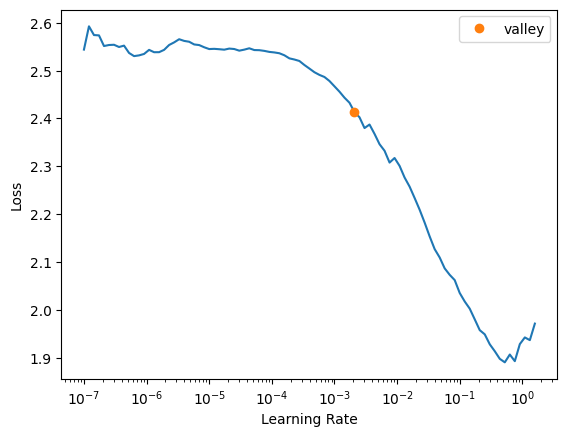

In [ ]:
learner_dept.lr_find()

In [ ]:
from fastai.callback.progress import ProgressCallback
learner_dept.remove_cbs(ProgressCallback)

learner_dept.fit_one_cycle(5, lr_max=0.002)

[0, 1.5220226049423218, 0.8454035520553589, 0.7737801671028137, '00:08']
[1, 1.0778714418411255, 0.7098358273506165, 0.7777230143547058, '00:06']
[2, 0.9296067953109741, 0.6365038752555847, 0.7811729907989502, '00:07']
[3, 0.8941379189491272, 0.6323226690292358, 0.7851158380508423, '00:06']
[4, 0.8248130679130554, 0.6297577023506165, 0.7870872616767883, '00:07']


####LinkedIN department prediction

In [ ]:
linkedin_copy = df_linkedin.copy()
linkedin_copy

,organization,linkedin,position,startDate,endDate,status,department,seniority
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokurist,2019-08,None,active,Other,Management
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,betriebswirtin,2019-07,None,active,Other,Professional
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokuristin,2019-07,None,active,Other,Management
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management
...,...,...,...,...,...,...,...,...
2632,malteserorden,,kanzler der deutschen assoziation,2015-01,None,active,Other,Management
2633,bistum,,justitiar,2014-03,None,active,Other,Professional
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilfsdienst,präsidium,1999,None,active,Other,Management


In [ ]:
dls_linkedIN = learner_dept.dls.test_dl(linkedin_copy['position'])
preds, _ = learner_dept.get_preds(dl=dls_linkedIN)
predicted_indices = preds.argmax(dim=1)
predicted_labels = [learner_dept.dls.vocab[1][i] for i in predicted_indices]
linkedin_copy['predicted_department'] = predicted_labels
linkedin_copy

,organization,linkedin,position,startDate,endDate,status,department,seniority,predicted_department
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokurist,2019-08,None,active,Other,Management,Information Technology
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management,Sales
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,betriebswirtin,2019-07,None,active,Other,Professional,Sales
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokuristin,2019-07,None,active,Other,Management,Information Technology
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management,Sales
...,...,...,...,...,...,...,...,...,...
2632,malteserorden,,kanzler der deutschen assoziation,2015-01,None,active,Other,Management,Sales
2633,bistum,,justitiar,2014-03,None,active,Other,Professional,Sales
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management,Information Technology
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilfsdienst,präsidium,1999,None,active,Other,Management,Sales


In [ ]:
fastai_accuracy_dept = accuracy_score(linkedin_copy['department'], linkedin_copy['predicted_department'])

print(f'fastai Department Prediction Accuracy: {fastai_accuracy_dept}')

fastai Department Prediction Accuracy: 0.13804173354735153


####Seniority csv model evaluation

In [ ]:
dls_seni = TextDataLoaders.from_df(df_seniority, text_col='text', label_col='label', valid_pct=0.2, seed=42)

learner_seni = text_classifier_learner(dls_seni, AWD_LSTM, metrics=accuracy)

In [ ]:
dls_seni.show_batch(max_n=3)

,text,category
0,xxbos sales xxunk xxunk oem | executive commercial xxunk xxunk | consultant | healthcare it & life xxunk xxunk data xxunk | data xxunk | xxunk,Senior
1,xxbos finance manager & erp consultant xxunk xxunk xxunk business transformation | xxunk ( xxunk ) | sap | xxunk,Senior
2,xxbos xxunk business developer ( xxunk - xxunk ) / sales manager xxunk - it / business developer xxunk,Senior


In [ ]:
learner_seni.summary()

<div></div>

SequentialRNN (Input shape: 64 x 26)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 26 x 1152      
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 26 x 400       
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
BatchNorm1d                               2400       True      
Dropout                                                        
____________________________________________________________________________
                     64 x 50             
Linear                                    60000      True      
ReLU                                       

<div></div>

SuggestedLRs(valley=0.0020892962347716093)

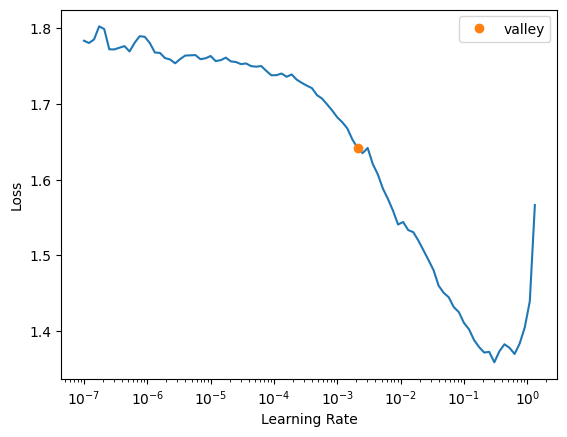

In [ ]:
learner_seni.lr_find()

In [ ]:
from fastai.callback.progress import ProgressCallback

learner_seni.remove_cbs(ProgressCallback)

In [ ]:
learner_seni.fit_one_cycle(5, lr_max=0.002)

[0, 1.1143205165863037, 0.6734134554862976, 0.8111405968666077, '00:07']
[1, 0.9055465459823608, 0.5972313284873962, 0.8116710782051086, '00:07']
[2, 0.820648193359375, 0.5195193886756897, 0.8312997221946716, '00:06']
[3, 0.7927019000053406, 0.5192199945449829, 0.8323607444763184, '00:07']
[4, 0.7689793705940247, 0.5106738209724426, 0.8366047739982605, '00:06']


###LinkedIn seniority prediction

In [ ]:
dls_linkedIN_seni = learner_seni.dls.test_dl(linkedin_copy['position'])
senipreds, _ = learner_seni.get_preds(dl=dls_linkedIN_seni)
senipredicted_indices = senipreds.argmax(dim=1)
senipredicted_labels = [learner_seni.dls.vocab[1][i] for i in senipredicted_indices]
linkedin_copy['predicted_seniority'] = senipredicted_labels
linkedin_copy

,organization,linkedin,position,startDate,endDate,status,department,seniority,predicted_seniority
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokurist,2019-08,None,active,Other,Management,Lead
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,betriebswirtin,2019-07,None,active,Other,Professional,Lead
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokuristin,2019-07,None,active,Other,Management,Lead
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management,Management
...,...,...,...,...,...,...,...,...,...
2632,malteserorden,,kanzler der deutschen assoziation,2015-01,None,active,Other,Management,Lead
2633,bistum,,justitiar,2014-03,None,active,Other,Professional,Lead
2634,foresta management,,geschäftsführer,2010-01,None,active,Other,Management,Lead
2635,malteser hilfsdienst,https://www.linkedin.com/company/malteser-hilfsdienst,präsidium,1999,None,active,Other,Management,Lead


In [ ]:
fastai_accuracy_seni = accuracy_score(linkedin_copy['seniority'], linkedin_copy['predicted_seniority'])

print(f'fastai Seniority Prediction Accuracy: {fastai_accuracy_seni}')

fastai Seniority Prediction Accuracy: 0.32263242375601925


##f.) LLMs: Hugging Face Transformers with DistilBERT

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch import nn
import fastai
import transformers
from transformers import pipeline

In [ ]:
df_department

,text,label
0,adjoint directeur communication,Marketing
1,advisor strategy and projects,Project Management
2,beratung & projekte,Project Management
3,beratung & projektmanagement,Project Management
4,beratung und projektmanagement kommunale partner,Project Management
...,...,...
10140,vp sales d.a.ch.,Sales
10141,vp sales dach,Sales
10142,vp sales development & strategy,Sales
10143,vp sales germany,Sales


In [ ]:
from sklearn.preprocessing import LabelEncoder

dept_encoder = LabelEncoder()
seni_encoder = LabelEncoder()

y_train_bert_deptE = dept_encoder.fit_transform(y_train_dept)
y_train_bert_seniE = seni_encoder.fit_transform(y_train_seni)


y_test_bert_deptE = dept_encoder.transform(y_test_dept)
y_test_bert_seniE = seni_encoder.transform(y_test_seni)


In [ ]:
model_name = 'distilbert-base-uncased'

model_dept = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=len(dept_encoder.classes_))

model_seni = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=len(seni_encoder.classes_))

tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from datasets import load_dataset, DatasetDict, Dataset

def datasets (X_train, y_train, X_test, y_test):
  train_data = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
  test_data = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))
  dataset = DatasetDict({
      'train': train_data,
      'test': test_data
  })
  return dataset

# Department datasets
dept_datasets = datasets(X_train_dept, y_train_bert_deptE, X_test_dept, y_test_bert_deptE)

# Seniority datasets
seni_datasets = datasets(X_train_seni, y_train_bert_seniE, X_test_seni, y_test_bert_seniE)

In [ ]:
def tokenized(data):
    return tokenizer(data['text'], padding='max_length', truncation=True)

input_dept_tokenized = dept_datasets.map(tokenized, batched=True)
input_seni_tokenized = seni_datasets.map(tokenized, batched=True)

Map:   0%|          | 0/8116 [00:00<?, ? examples/s]

Map:   0%|          | 0/2029 [00:00<?, ? examples/s]

Map:   0%|          | 0/7542 [00:00<?, ? examples/s]

Map:   0%|          | 0/1886 [00:00<?, ? examples/s]

In [ ]:
my_path_dept = '/content/drive/MyDrive/Colab Notebooks/JMU/Practical Data Science/Assignments/Final Project/BERT/Department'

my_path_seni = '/content/drive/MyDrive/Colab Notebooks/JMU/Practical Data Science/Assignments/Final Project/BERT/Seniority'

# use default parameters
def training_args (output_path):
  training_args = TrainingArguments(
    output_dir=output_path,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False, #no public to hugging face
    report_to="none"
)
  return training_args


**AI generated compute_metrics:**

**Prompt:**

How to set compute_metrics for the trainer according to my training arguments codes?

**AI response:**

To track Accuracy (and other metrics like F1-score) during your DistilBERT training, you must define a compute_metrics function. By default, the Hugging Face Trainer only reports "Loss," which is a mathematical error score that is difficult for humans to interpret for a classification task.

Here is the code and the logic for the compute_metrics Function. This function will take the raw predictions from your model and compare them to your encoded ground-truth labels.


In [ ]:
!pip install evaluate
import evaluate

In [ ]:
# Load the accuracy metric
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    # 'logits' are the raw scores from the model's last layer
    # 'labels' are the actual ground truth numbers
    logits, labels = eval_pred

    # Use argmax to pick the category ID with the highest score
    predictions = np.argmax(logits, axis=-1)

    # Calculate and return the accuracy
    return metric.compute(predictions=predictions, references=labels)



###Department csv model evaluation

In [ ]:
# Use default parameters from documentation
# Department trainer

training_args_dept = training_args (my_path_dept)

dept_trainer = Trainer(
    model=model_dept,
    args=training_args_dept,
    train_dataset=input_dept_tokenized["train"],
    eval_dataset=input_dept_tokenized["test"],
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
)

dept_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.144800,0.089882,0.982750
2,0.048800,0.077344,0.987186


TrainOutput(global_step=1016, training_loss=0.09599091928070924, metrics={'train_runtime': 899.9928, 'train_samples_per_second': 18.036, 'train_steps_per_second': 1.129, 'total_flos': 2150555928600576.0, 'train_loss': 0.09599091928070924, 'epoch': 2.0})

###Seniority model evaluation

In [ ]:
# Seniority trainer

training_args_seni = training_args (my_path_seni)

seni_trainer = Trainer(
    model=model_seni,
    args=training_args_seni,
    train_dataset=input_seni_tokenized["train"],
    eval_dataset=input_seni_tokenized["test"],
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
)

seni_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.053161,0.988335
2,0.243300,0.029660,0.994168


TrainOutput(global_step=944, training_loss=0.14488427214703317, metrics={'train_runtime': 845.9693, 'train_samples_per_second': 17.83, 'train_steps_per_second': 1.116, 'total_flos': 1998245143203840.0, 'train_loss': 0.14488427214703317, 'epoch': 2.0})

Load the best model to run a final classification report.

In [ ]:
dept_saved_model= dept_trainer.state.best_model_checkpoint

seni_saved_model = seni_trainer.state.best_model_checkpoint

In [ ]:
def get_report (saved_model,input_tokenised, trainer, target_encoder):
  best_model = AutoModelForSequenceClassification.from_pretrained(saved_model)
  test_results = trainer.predict(input_tokenised["test"])
  y_pred = np.argmax(test_results.predictions, axis=-1)
  y_true = test_results.label_ids
  target = target_encoder.classes_
  report = classification_report(y_true, y_pred, target_names=target)
  return report

In [ ]:
dept_report = get_report(dept_saved_model, input_dept_tokenized, dept_trainer, dept_encoder)

seni_report = get_report(seni_saved_model, input_seni_tokenized, seni_trainer, seni_encoder)

print(f'Department Prediction: \n{dept_report}')
print(f'\nSeniority Prediction: \n{seni_report}')

Department Prediction: 
                        precision    recall  f1-score   support

        Administrative       1.00      1.00      1.00        11
  Business Development       1.00      0.99      1.00       140
            Consulting       0.94      0.97      0.96        33
      Customer Support       1.00      0.10      0.18        10
       Human Resources       1.00      0.80      0.89         5
Information Technology       0.96      0.97      0.97       264
             Marketing       0.99      1.00      1.00       854
                 Other       0.80      1.00      0.89        12
    Project Management       0.97      0.97      0.97        33
            Purchasing       1.00      0.86      0.92         7
                 Sales       0.99      1.00      0.99       660

              accuracy                           0.99      2029
             macro avg       0.97      0.88      0.89      2029
          weighted avg       0.99      0.99      0.99      2029


Seniority Pr


###LinkedIn prediction



In [ ]:
linkedin_dataset = Dataset.from_pandas(pd.DataFrame({'text': df_linkedin['position']}))

linkedin_tokenized = linkedin_dataset.map(tokenized, batched=True)


Map:   0%|          | 0/623 [00:00<?, ? examples/s]

I use AI to implement linkedin data predecition.

Prompt to AI: How can I use already trained BERT models to test linkedin data?

Below codes are produced by AI.

In [ ]:
import numpy as np
import torch.nn.functional as F
import torch

def make_predictions(trainer, tokenized_data, encoder, column_name):
    prediction = trainer.predict(tokenized_data)

    # Get the raw logits (scores)
    logits = prediction.predictions

    # Find the index with the highest score (Argmax)
    pred_ids = np.argmax(logits, axis=-1)

    # Convert IDs back to words (e.g., 0 -> "Sales") using your encoder
    predicted_labels = encoder.inverse_transform(pred_ids)

    # --- PRO TIP: Confidence Check for "Other" Class ---
    # Calculate probabilities (0-100%)
    probs = F.softmax(torch.tensor(logits), dim=-1)
    max_probs, _ = torch.max(probs, dim=-1)

    # If the model is less than 60% sure, mark it as 'other' (optional but recommended)
    final_labels = []
    for label, prob in zip(predicted_labels, max_probs):
        if prob < 0.60:
            final_labels.append('other')
        else:
            final_labels.append(label)

    return final_labels


df_linkedin['pred_dept_bert'] = make_predictions(
    dept_trainer,
    linkedin_tokenized,
    dept_encoder,
    "department"
)


df_linkedin['pred_seni_bert'] = make_predictions(
    seni_trainer,
    linkedin_tokenized,
    seni_encoder,
    "seniority"
)



In [ ]:
df_linkedin.head(10)

,organization,linkedin,position,startDate,endDate,status,department,seniority,pred_dept_bert,pred_seni_bert
0,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokurist,2019-08,None,active,Other,Management,Information Technology,Lead
1,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management,Information Technology,Management
2,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,betriebswirtin,2019-07,None,active,Other,Professional,Sales,Junior
3,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,prokuristin,2019-07,None,active,Other,Management,Information Technology,Junior
4,depot4design gmbh,https://www.linkedin.com/company/depot4design-gmbh,cfo,2019-07,None,active,Other,Management,Information Technology,Management
6,computer solutions,https://www.linkedin.com/company/computer-solutions,solutions architect,2024-03,None,active,Information Technology,Professional,Information Technology,other
14,udo weber,https://www.linkedin.com/company/udo-weber,medizintechnik beratung,2025-01,None,active,Consulting,Professional,other,Junior
17,grupo viajes kontiki.,,director expansión de negocio.,2024-09,None,active,Business Development,Director,Information Technology,Director
18,air & ground operations consultancy,https://www.linkedin.com/company/agoc-spain,gerente comercial,2024-04,None,active,Sales,Lead,other,Junior
19,viajes oceano s.l.,,administrador unico,2010-12,None,active,Administrative,Professional,Information Technology,other


In [ ]:
department_accuracy = accuracy_score(df_linkedin['department'], df_linkedin['pred_dept_bert'])
seniority_accuracy = accuracy_score(df_linkedin['seniority'], df_linkedin['pred_seni_bert'])

print(f'Department Prediction Accuracy: {department_accuracy}')
print(f'Seniority Prediction Accuracy: {seniority_accuracy}')

Department Prediction Accuracy: 0.22632423756019263
Seniority Prediction Accuracy: 0.4317817014446228


data imbalance

In [ ]:
value_counts_csv = df_department['label'].value_counts()
value_counts_linkedin = df_linkedin['department'].value_counts()

value_department = pd.DataFrame({'department': value_counts_csv.index, 'count_label': value_counts_df.values})

value_linkedin = pd.DataFrame({'department': value_counts_linkedin.index, 'count_linkedin': value_counts_linkedin.values})

merged_dept_df = pd.merge(value_department, value_linkedin, on='department', how='outer')

merged_dept_df

,department,count_label,count_linkedin
0,Administrative,83,14
1,Business Development,620,20
2,Consulting,167,39
3,Customer Support,33,6
4,Human Resources,31,16
5,Information Technology,1305,62
6,Marketing,4295,22
7,Other,42,344
8,Project Management,201,39
9,Purchasing,40,15


In [ ]:
seni_counts_csv = df_seniority['label'].value_counts()
seni_counts_linkedin = df_linkedin['seniority'].value_counts()

value_seni = pd.DataFrame({'seniority': seni_counts_csv.index, 'count_label': seni_counts_df.values})

seni_linkedin = pd.DataFrame({'seniority': seni_counts_linkedin.index, 'count_linkedin': seni_counts_linkedin.values})

merged_seni_df = pd.merge(value_seni, seni_linkedin, on='seniority', how='outer')

merged_seni_df

,seniority,count_label,count_linkedin
0,Director,984.0,34
1,Junior,409.0,12
2,Lead,3546.0,125
3,Management,756.0,192
4,Professional,NaN,216
5,Senior,3733.0,44
